In [1]:
import pandas as pd
import numpy as np
import gzip
import re
# import seaborn as sns

In [4]:
# # open file 712_lc_20221026_perind.counts.gz
with gzip.open("/home/ls/rachelcw/projects/LEAFCUTTER/lc_20230512/lc_20230512_perind.counts.gz") as file:
    data= pd.read_csv(file, sep=' ')
# convert fraction to decimal numbers
for sample in data.columns[1:713]:
    for i in range(data.shape[0]):
        fraction=data.at[i,sample]
        if fraction == '0/0':
            num = 0
        else:
            str_split = re.split('/', fraction)
            num = int(str_split[0])/int(str_split[1])
            num = round(num,3)
        data.at[i,sample]=num

data.to_csv('/home/ls/rachelcw/projects/LEAFCUTTER/lc_20230512/lc_20230512_perind.percent.csv',index=0)

In [41]:
# cp /home/ls/rachelcw/projects/LEAFCUTTER/lc_20230512/lc_20230512_perind.percent.csv /data01/private/projects/splicing_cll/data/cllmap/leafcutter/
data=pd.read_csv('/home/ls/rachelcw/projects/LEAFCUTTER/lc_20230512/lc_20230512_perind.percent.csv')
data[["chr","cluster"]]=data["chrom"].str.rsplit(":", n = 1, expand = True)
data=data[data["chrom"].str.startswith(("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16", "17","18","19","20","21","22","X","Y"))]

In [44]:
genes=pd.read_csv("/home/ls/rachelcw/projects/LEAFCUTTER/DS/DS.five_percent/analysis.20230512/ds.a1.20230512_cluster_significance.txt", sep='\t',usecols=['cluster','genes'])
genes[[ "chr","cluster"]]=genes["cluster"].str.split(":", n = 1, expand=True)

In [46]:
data_gene=data.merge(genes, on='cluster',how='left')
data_gene.drop(columns=["chr_x","chr_y","cluster"],inplace=True)
data_gene.dropna(axis=0,inplace=True) # rows without a gene name


In [49]:
data_gene.to_csv('/home/ls/rachelcw/projects/LEAFCUTTER/lc_20230512/lc_20230604_perind.percent.gene.csv',index=0)

In [4]:
# prepare data for peer
data=pd.read_csv('/home/ls/rachelcw/projects/LEAFCUTTER/lc_20230108/lc_20230108_perind.percent.csv')
data_for_peer=data.drop(columns='chrom')           

data_for_peer.to_csv("/home/ls/rachelcw/projects/PEER/data_for_peer_20230109.tsv", sep='\t')


In [7]:
# run peer
## /home/ls/rachelcw/projects/PEER/peer_comands.R ##

In [5]:
# # # ALPHA # # #
peer_alpha=pd.read_csv("/home/ls/rachelcw/projects/PEER/peer_20230109.PEER_alpha.txt",sep='\t')
peer_alpha["Peer Factor"]=np.arange(1,26)
#peer_alpha["log"]=np.log10(peer_alpha["Relevance"])

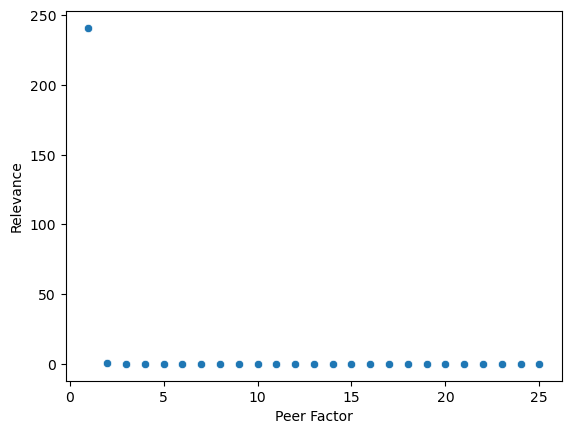

In [6]:

ax=sns.scatterplot(data=peer_alpha, x="Peer Factor",y='Relevance')


In [7]:
## peer results
peer_results=pd.read_csv("/home/ls/rachelcw/projects/PEER/peer_20230109.PEER_covariates.txt",sep='\t')
peer_results=peer_results.drop(columns="ID")


In [5]:
# file="/private1/private/data/cllmap/metadata/all_deidentifier_patAndSamp_20220308.tsv"
# table_sample=pd.read_csv(file,sep='\t')
# dict_sample=dict(zip(table_sample[table_sample.columns[0]],table_sample[table_sample.columns[1]]))

# #replace
# peer_results.columns=peer_results.columns.str.replace('.leafcutter','')


# peer_results=peer_results.rename(columns=dict_sample,inplace=True)



/tmp/ipykernel_1718482/2794020662.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  peer_results.columns=peer_results.columns.str.replace('.leafcutter','')


In [8]:
peer_results=peer_results.T
peer_results=peer_results.reset_index()
colname=["sample_id","PF1","PF2","PF3","PF4","PF5","PF6","PF7","PF8","PF9","PF10","PF11","PF12","PF13","PF14","PF15","PF16","PF17","PF18","PF19","PF20","PF21","PF22","PF23","PF24","PF25"]

peer_results=peer_results.rename(columns=dict(zip(peer_results.columns,colname)))


In [9]:

#covariates_table=pd.read_excel("/home/ls/rachelcw/projects/PEER/cllmap_expression_cluster_batch_correction_covariates.xlsx",sheet_name=0)
#covariates_table.to_csv('/home/ls/rachelcw/projects/PEER/covariates_table.csv')
covariates_table=pd.read_csv('/home/ls/rachelcw/projects/PEER/covariates_table.csv',index_col=0)
covariates_table=covariates_table[covariates_table.columns.drop(list(covariates_table.filter(regex='^PF')))] # drop out old PF
df_join =pd.merge(covariates_table,peer_results,on="sample_id",how='left' )



In [ ]:
df_join.to_csv('/home/ls/rachelcw/projects/PEER/covariates_table_20230109.csv', index=0)

In [27]:
df_join=df_join.filter(regex='^PF|QC')
df_corr=df_join.corr()


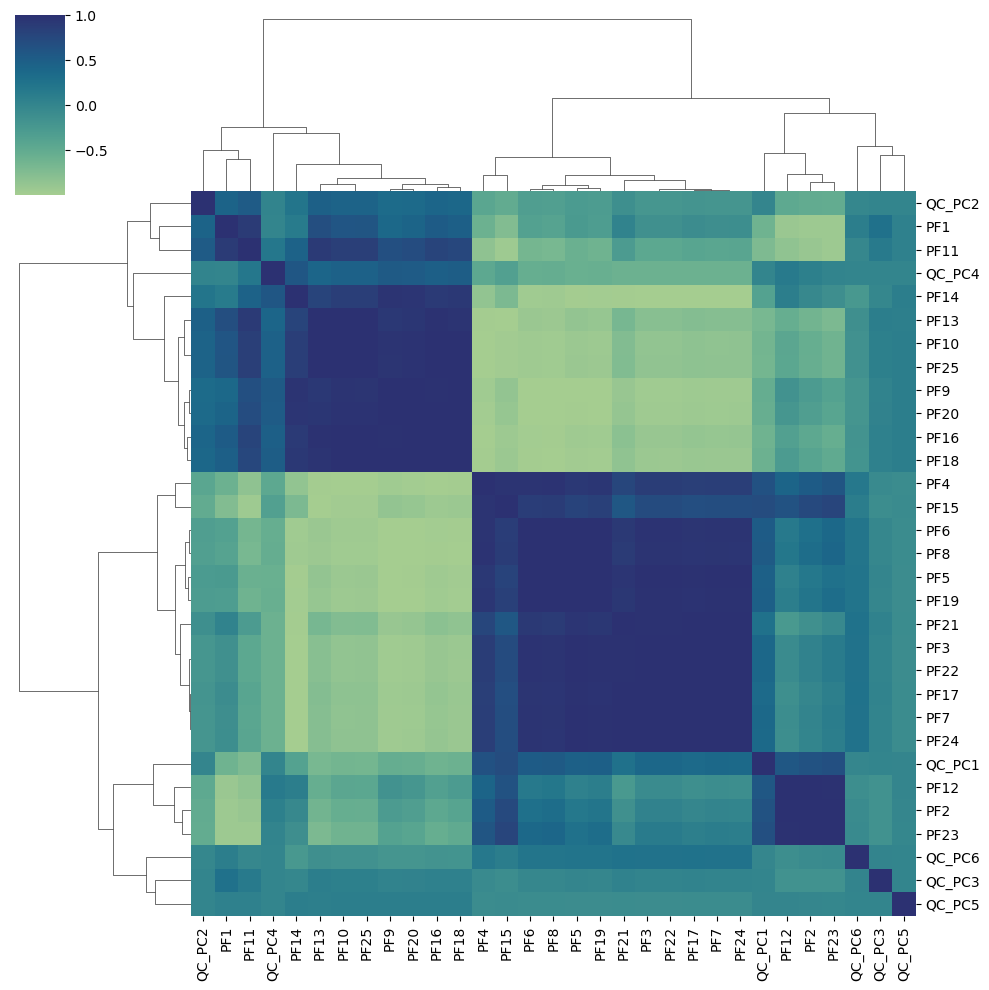

In [28]:
cr=sns.clustermap(df_corr,cmap="crest")

